# Air Quality Predication
![alt text](https://drive.google.com/uc?id=1tcHDyLqOq6e0ZtlMvDmABHFaC798ITLP)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv
Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


-> Additional Libaray Installation

In [1]:
%pip install prophet
%pip install seaborn
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



-> below code is used to import modules

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


# Data Preprocesing
![alt text](https://drive.google.com/uc?id=1fsXuSf-Ovifw-VewRbhgQ-wnClXwH9XA)


**Additional Variable Information**
* Date (DD/MM/YYYY)
* Time (HH.MM.SS)
* True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
* True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
* True hourly averaged NOx concentration in ppb (reference analyzer)
* PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* Temperature in Â°C
* Relative Humidity (%)
* AH Absolute Humidity

In [16]:
data_csv = pd.read_csv('C:\\Users\\rushabh nakum\\Desktop\\Minor Project 7 sem\\data\\AirQualityUCI.csv', sep=';', decimal=',')
print("Reading Csv File : " , data_csv.head(10))
print("Getting Info of Csv File :" , data_csv.info())
print("Shape of Columns : " , data_csv.shape)

Reading Csv File :           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
5  10/03/2004  23.00.00     1.2       1197.0      38.0       4.7   
6  11/03/2004  00.00.00     1.2       1185.0      31.0       3.6   
7  11/03/2004  01.00.00     1.0       1136.0      31.0       3.3   
8  11/03/2004  02.00.00     0.9       1094.0      24.0       2.3   
9  11/03/2004  03.00.00     0.6       1010.0      19.0       1.7   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972

* By Reading the data of csv we get know that all columns are been inetegrated in one but you can use the data by adding sep function during reading csv file
* But in Excel File the data columns are seprated

* There are no null value in this
* But null value is been assigined as Missing values are tagged with -200 value

In [17]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [18]:
data_csv = data_csv.iloc[:, :-2]

In [19]:
data_csv.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [15]:
data_csv.loc[[9356]]      # this is column no where last data is there

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [16]:
data_csv = data_csv.head(9356)

In [17]:
data_csv.shape

(9356, 15)

In [18]:
data_csv.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9351,04/04/2005,09.00.00,3.9,1297.0,-200.0,13.6,1102.0,523.0,507.0,187.0,1375.0,1583.0,18.2,36.3,0.7487
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


# Handling Missing Values

* Step 1 : Convert the -200 to NaN
* Step 2 : This NaN value change to value driven by mean function

![alt text](https://drive.google.com/uc?id=1-D8ojK7yG0v0mA5fG8hwx6U0jkCtkvHL)

In [19]:
data_csv.replace(to_replace = -200, value=numpy.NaN, inplace=True)

In [20]:
data_csv.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8442
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [21]:
data_csv.isin([-200]).sum(axis=0)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [22]:
numeric_columns = data_csv.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data_csv[numeric_columns]

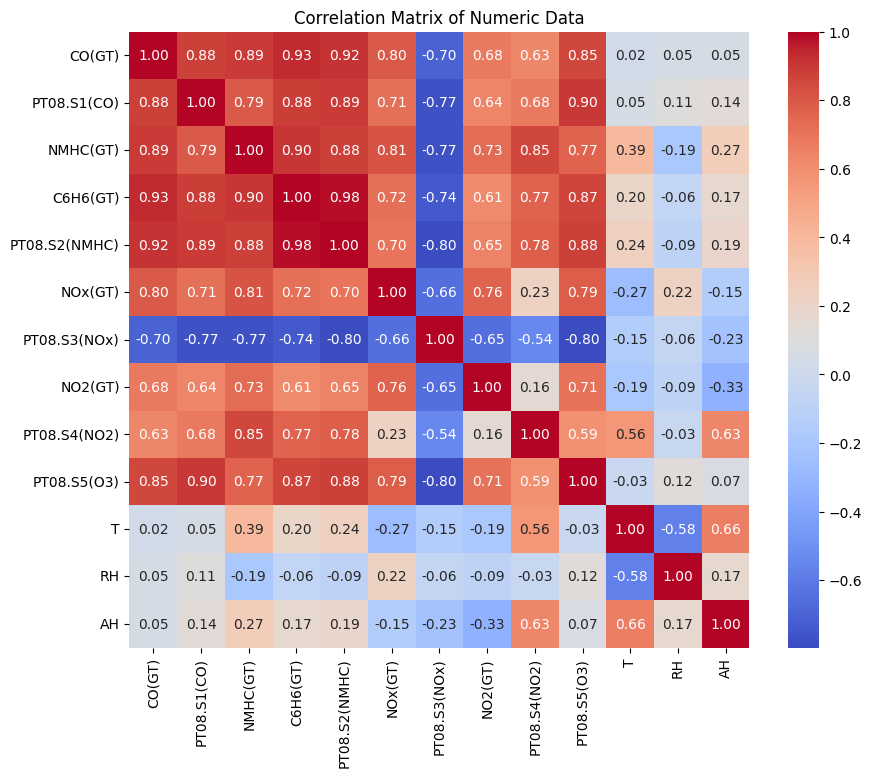

In [23]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Data")
plt.show()

In [24]:
numeric_data = numeric_data.fillna(numeric_data.mean())

In [25]:
numeric_data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [26]:
data_date_time = data_csv[['Date','Time']]

In [27]:
data_csv = pd.concat([data_date_time, numeric_data], axis=1)

In [28]:
data_csv.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

After Cleaning the data we can use this in machine learning
Using this data we can do two things.

* Forecasting
* Regression

# Forecasting and Regression

![alt text](https://drive.google.com/uc?export=view&id=1_xDXVqtkLprUdd97hpeU4sKlJmvIjo2Y)



* FB Prophet Model is used to train the machine on live or pervious data of date and time basically Prophet model works on date and time series

* FB Prophet Model Documentation : https://facebook.github.io/prophet/docs/installation.html#python


![alt text](https://drive.google.com/uc?export=view&id=1QgfR-IzDWiQyLZCU4KeQGKLJvtHVyK-c)

In [29]:
# In FB Prophet model we must convert date from DD/MM/YYYY to YYYY-MM-DD

date_info = data_csv['Date']
date_info = pd.to_datetime(date_info, format='%d/%m/%Y')
date_info.head()


0   2004-03-10
1   2004-03-10
2   2004-03-10
3   2004-03-10
4   2004-03-10
Name: Date, dtype: datetime64[ns]

In [30]:
# Convert Time series from "." to ":"
time_info = data_csv['Time']
time_info = time_info.str.replace('.', ':')
time_info.head()

0    18:00:00
1    19:00:00
2    20:00:00
3    21:00:00
4    22:00:00
Name: Time, dtype: object

In [31]:
# Combine two columns
data_time = pd.concat([date_info, time_info], axis=1)
data_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [32]:
# In prophet model algo of fb we have combine column in one called ds
data_time['ds'] = data_time['Date'].astype(str)+ ' ' + data_time['Time'].astype(str)

In [33]:
data_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [34]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9356 entries, 0 to 9355
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9356 non-null   datetime64[ns]
 1   Time    9356 non-null   object        
 2   ds      9356 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


**We have to convert ds from object to datetime64[ns]**

In [35]:
data = pd.DataFrame()

In [36]:
data['ds'] = pd.to_datetime(data_time['ds'])

In [37]:
def create_y_column(data_csv):
    print("Available columns:", list(data_csv.columns))

    user_input = input("Enter the column name to use as 'y': ").strip()

    if user_input not in data_csv.columns:
        raise ValueError(f"Column '{user_input}' does not exist in the DataFrame.")

    data = data_csv.iloc[2:].copy()
    data['y'] = data[user_input]

    return data['y']

In [39]:
data['y'] = create_y_column(data_csv)

Available columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9354 entries, 2 to 9355
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9354 non-null   datetime64[ns]
 1   y       9354 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 219.2 KB


In [45]:
data = data.dropna()

In [47]:
data.tail()

,ds,y
9351,2005-04-04 09:00:00,3.9
9352,2005-04-04 10:00:00,3.1
9353,2005-04-04 11:00:00,2.4
9354,2005-04-04 12:00:00,2.4
9355,2005-04-04 13:00:00,2.1


**FB Prophet Model install and use for forecaste and regression.**

In [48]:
# Traning the prophet model on data

model = Prophet(yearly_seasonality=True)
model.fit(data)

10:54:38 - cmdstanpy - INFO - Chain [1] start processing
10:54:39 - cmdstanpy - INFO - Chain [1] done processing


In [53]:
future = model.make_future_dataframe(periods=7505,freq='D')
print("Predicting the Future of value of ds \n ",future.tail())
forecast = model.predict(future)
print("Predicting the Future Value of y : \n", forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

"""
ds : date and time series in format of YYYY-MM-DD HH:MM:SS
yhat : predicted value
yhat_lower : lower bound of predicted value
yhat_upper : upper bound of predicted value

"""

Predicting the Future of value of ds 
                         ds
16854 2025-10-17 13:00:00
16855 2025-10-18 13:00:00
16856 2025-10-19 13:00:00
16857 2025-10-20 13:00:00
16858 2025-10-21 13:00:00
Predicting the Future Value of y : 
                        ds      yhat  yhat_lower  yhat_upper
16854 2025-10-17 13:00:00 -4.938154   -6.447998   -3.361033
16855 2025-10-18 13:00:00 -5.508708   -7.055552   -4.042058
16856 2025-10-19 13:00:00 -5.862779   -7.356559   -4.324898
16857 2025-10-20 13:00:00 -5.419699   -6.955427   -3.952756
16858 2025-10-21 13:00:00 -5.047417   -6.561962   -3.527030


'\nds : date and time series in format of YYYY-MM-DD HH:MM:SS\nyhat : predicted value\nyhat_lower : lower bound of predicted value\nyhat_upper : upper bound of predicted value\n\n'

c:\Users\rushabh nakum\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\rushabh nakum\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


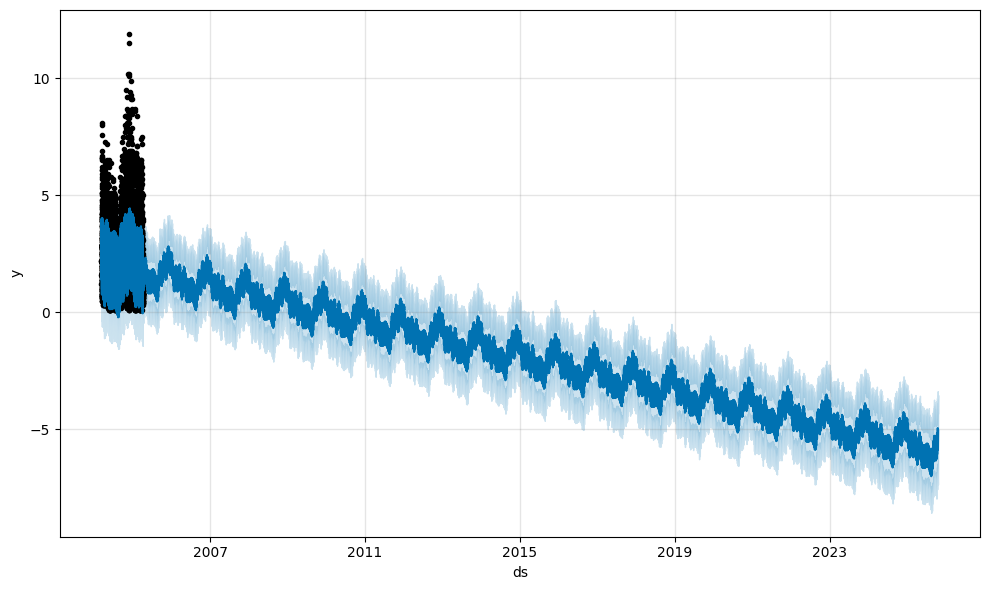

In [54]:
# Createing the forecast graph
fig = model.plot(forecast)

# Pipeline and Pickeling
![alt text](https://drive.google.com/uc?export=view&id=1jY_K9bbCYvibeH48Ph3btOnFe-xnIRGz)


In [59]:
import pandas as pd
import pickle
from prophet import Prophet

def load_data(file_path):
    return pd.read_csv(file_path, sep=';', decimal=',')

def create_y_column(data_csv):
    print("Available columns:", list(data_csv.columns))

    user_input = input("Enter the column name to use as 'y': ").strip()

    if user_input not in data_csv.columns:
        raise ValueError(f"Column '{user_input}' does not exist in the DataFrame.")

    data = data_csv.iloc[2:].copy()
    data['y'] = data[user_input]

    return data

def preprocess_data(df, date_column, time_column):
    df = df.iloc[:, :-2]
    df = df.head(9356)
    df.replace(to_replace=-200, value=float('NaN'), inplace=True)
    df[date_column] = pd.to_datetime(df[date_column], format='%d/%m/%Y')
    df[time_column] = df[time_column].str.replace('.', ':')
    df['ds'] = df[date_column].astype(str) + ' ' + df[time_column].astype(str)

    df = create_y_column(df)

    df['y'].fillna(df['y'].mean(), inplace=True)
    return df

def apply_prophet(df):
    model = Prophet()
    model.fit(df)
    return model

def save_model(model, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)

def run_prophet_pipeline(file_path, date_column, time_column, model_file_path):
    data = load_data(file_path)
    preprocessed_data = preprocess_data(data, date_column, time_column)
    prophet_model = apply_prophet(preprocessed_data)
    save_model(prophet_model, model_file_path)

if __name__ == "__main__":
    file_path = 'C:\\Users\\rushabh nakum\\Desktop\\Minor Project 7 sem\\data\\AirQualityUCI.csv'
    date_column = 'Date'
    time_column = 'Time'
    model_file_path = 'prophet_model.pkl'

    run_prophet_pipeline(file_path, date_column, time_column, model_file_path)

Available columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'ds']


11:02:18 - cmdstanpy - INFO - Chain [1] start processing
11:02:19 - cmdstanpy - INFO - Chain [1] done processing


___________________________________________________________________________________________________
In the end we got to know the fb prophet model is not used cases so we use LSTM
____________________________________________________________________________________________________